In [69]:
import pandas as pd

In [70]:
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datasets

In [71]:
dataset_tempchange_file_path = './datasets/Environment_Temperature_change_E_All_Data.csv'
dataset_greenhouse_gas_file_path = './datasets/greenhouse_gas_inventory_data_data.csv'

df_tempchange = pd.read_csv(dataset_tempchange_file_path, encoding="ISO-8859-1")
df_greenhouse_gas = pd.read_csv(dataset_greenhouse_gas_file_path, encoding="ISO-8859-1")

print (df_tempchange.head())
print (df_greenhouse_gas.head())


   Area Code Area Code (M49)         Area  Months Code    Months  \
0          2            '004  Afghanistan         7001   January   
1          2            '004  Afghanistan         7001   January   
2          2            '004  Afghanistan         7002  February   
3          2            '004  Afghanistan         7002  February   
4          2            '004  Afghanistan         7003     March   

   Element Code             Element Unit  Y1961 Y1961F  ...  Y2019 Y2019F  \
0          7271  Temperature change   °c  0.745      E  ...  2.911      E   
1          6078  Standard Deviation   °c  1.954      E  ...  1.954      E   
2          7271  Temperature change   °c -1.787      E  ...  0.147      E   
3          6078  Standard Deviation   °c  2.591      E  ...  2.591      E   
4          7271  Temperature change   °c  0.445      E  ...  0.360      E   

   Y2020 Y2020F  Y2021 Y2021F  Y2022 Y2022F  Y2023 Y2023F  
0 -0.547      E  0.701      E  2.458      E -2.200      E  
1  1.954

In [72]:
df_greenhouse_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 262.8+ KB


In [73]:
df_tempchange.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Columns: 134 entries, Area Code to Y2023F
dtypes: float64(63), int64(3), object(68)
memory usage: 9.9+ MB


In [74]:
df_tempchange.head()

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1961F,...,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F,Y2022,Y2022F,Y2023,Y2023F
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°c,0.745,E,...,2.911,E,-0.547,E,0.701,E,2.458,E,-2.200,E
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°c,1.954,E,...,1.954,E,1.954,E,1.954,E,1.954,E,1.954,E
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°c,-1.787,E,...,0.147,E,2.544,E,4.220,E,2.502,E,3.697,E
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°c,2.591,E,...,2.591,E,2.591,E,2.591,E,2.591,E,2.591,E
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°c,0.445,E,...,0.360,E,0.664,E,2.625,E,3.756,E,3.895,E


In [75]:
df_tempchange.tail()

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1961F,...,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F,Y2022,Y2022F,Y2023,Y2023F
9651,5873,'198,OECD,7018,JunJulAug,6078,Standard Deviation,°c,0.248,E,...,0.248,E,0.248,E,0.248,E,0.248,E,0.248,E
9652,5873,'198,OECD,7019,SepOctNov,7271,Temperature change,°c,0.039,E,...,1.214,E,1.376,E,1.763,E,1.289,E,2.254,E
9653,5873,'198,OECD,7019,SepOctNov,6078,Standard Deviation,°c,0.378,E,...,0.378,E,0.378,E,0.378,E,0.378,E,0.378,E
9654,5873,'198,OECD,7020,Meteorological year,7271,Temperature change,°c,0.169,E,...,1.291,E,1.431,E,1.589,E,1.237,E,1.706,E
9655,5873,'198,OECD,7020,Meteorological year,6078,Standard Deviation,°c,0.259,E,...,0.259,E,0.259,E,0.259,E,0.259,E,0.259,E


for each column that starts with a y and ends in a f, delete that column

In [76]:
for col in df_tempchange. columns:
    print (col)

Area Code
Area Code (M49)
Area
Months Code
Months
Element Code
Element
Unit
Y1961
Y1961F
Y1962
Y1962F
Y1963
Y1963F
Y1964
Y1964F
Y1965
Y1965F
Y1966
Y1966F
Y1967
Y1967F
Y1968
Y1968F
Y1969
Y1969F
Y1970
Y1970F
Y1971
Y1971F
Y1972
Y1972F
Y1973
Y1973F
Y1974
Y1974F
Y1975
Y1975F
Y1976
Y1976F
Y1977
Y1977F
Y1978
Y1978F
Y1979
Y1979F
Y1980
Y1980F
Y1981
Y1981F
Y1982
Y1982F
Y1983
Y1983F
Y1984
Y1984F
Y1985
Y1985F
Y1986
Y1986F
Y1987
Y1987F
Y1988
Y1988F
Y1989
Y1989F
Y1990
Y1990F
Y1991
Y1991F
Y1992
Y1992F
Y1993
Y1993F
Y1994
Y1994F
Y1995
Y1995F
Y1996
Y1996F
Y1997
Y1997F
Y1998
Y1998F
Y1999
Y1999F
Y2000
Y2000F
Y2001
Y2001F
Y2002
Y2002F
Y2003
Y2003F
Y2004
Y2004F
Y2005
Y2005F
Y2006
Y2006F
Y2007
Y2007F
Y2008
Y2008F
Y2009
Y2009F
Y2010
Y2010F
Y2011
Y2011F
Y2012
Y2012F
Y2013
Y2013F
Y2014
Y2014F
Y2015
Y2015F
Y2016
Y2016F
Y2017
Y2017F
Y2018
Y2018F
Y2019
Y2019F
Y2020
Y2020F
Y2021
Y2021F
Y2022
Y2022F
Y2023
Y2023F


In [77]:
# Remove year flag columns (for example: Y1980F)

columns_to_drop = [col for col in df_tempchange.columns if col.startswith('Y') and col.endswith('F')]
df_tempchange = df_tempchange.drop(columns=columns_to_drop)

for col in df_tempchange. columns:
    print (col)

Area Code
Area Code (M49)
Area
Months Code
Months
Element Code
Element
Unit
Y1961
Y1962
Y1963
Y1964
Y1965
Y1966
Y1967
Y1968
Y1969
Y1970
Y1971
Y1972
Y1973
Y1974
Y1975
Y1976
Y1977
Y1978
Y1979
Y1980
Y1981
Y1982
Y1983
Y1984
Y1985
Y1986
Y1987
Y1988
Y1989
Y1990
Y1991
Y1992
Y1993
Y1994
Y1995
Y1996
Y1997
Y1998
Y1999
Y2000
Y2001
Y2002
Y2003
Y2004
Y2005
Y2006
Y2007
Y2008
Y2009
Y2010
Y2011
Y2012
Y2013
Y2014
Y2015
Y2016
Y2017
Y2018
Y2019
Y2020
Y2021
Y2022
Y2023


In [78]:
# # Remove invalid Months

# valid_months = ["January", "February", "March", "April", "May", "June",
#     "July", "August", "September", "October", "November", "December"]

# df_tempchange = df_tempchange[df_tempchange['Months'].isin(valid_months)]
# df_tempchange.tail()

df_tempchange = df_tempchange[df_tempchange['Months'] == 'Meteorological year']
df_tempchange.tail()


,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
9587,5848,'907,Annex I countries,7020,Meteorological year,6078,Standard Deviation,°c,0.307,0.307,...,0.307,0.307,0.307,0.307,0.307,0.307,0.307,0.307,0.307,0.307
9620,5849,'908,Non-Annex I countries,7020,Meteorological year,7271,Temperature change,°c,0.027,-0.062,...,0.988,1.259,1.348,1.297,1.210,1.313,1.301,1.348,1.185,1.583
9621,5849,'908,Non-Annex I countries,7020,Meteorological year,6078,Standard Deviation,°c,0.203,0.203,...,0.203,0.203,0.203,0.203,0.203,0.203,0.203,0.203,0.203,0.203
9654,5873,'198,OECD,7020,Meteorological year,7271,Temperature change,°c,0.169,-0.005,...,0.823,1.292,1.868,1.367,1.093,1.291,1.431,1.589,1.237,1.706
9655,5873,'198,OECD,7020,Meteorological year,6078,Standard Deviation,°c,0.259,0.259,...,0.259,0.259,0.259,0.259,0.259,0.259,0.259,0.259,0.259,0.259


In [79]:
df_tempchange = df_tempchange[df_tempchange['Element'] == 'Temperature change']
df_tempchange


,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
32,2,'004,Afghanistan,7020,Meteorological year,7271,Temperature change,°c,-0.126,-0.173,...,0.521,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956
66,3,'008,Albania,7020,Meteorological year,7271,Temperature change,°c,0.635,0.342,...,1.285,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122
100,4,'012,Algeria,7020,Meteorological year,7271,Temperature change,°c,0.155,0.120,...,1.713,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274
134,5,'016,American Samoa,7020,Meteorological year,7271,Temperature change,°c,0.121,0.000,...,0.840,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951
168,6,'020,Andorra,7020,Meteorological year,7271,Temperature change,°c,0.756,0.120,...,1.917,1.631,1.918,1.854,1.835,1.884,2.480,1.450,3.155,2.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,5815,'901,Low Income Food Deficit Countries,7020,Meteorological year,7271,Temperature change,°c,-0.081,-0.189,...,0.834,1.081,1.263,1.259,1.093,1.167,1.038,1.274,1.058,1.389
9552,5817,'902,Net Food Importing Developing Countries,7020,Meteorological year,7271,Temperature change,°c,-0.016,-0.098,...,0.962,1.257,1.348,1.280,1.198,1.325,1.222,1.309,1.058,1.505
9586,5848,'907,Annex I countries,7020,Meteorological year,7271,Temperature change,°c,0.458,0.164,...,1.130,1.618,2.102,1.614,1.390,1.610,2.223,1.620,1.615,2.003
9620,5849,'908,Non-Annex I countries,7020,Meteorological year,7271,Temperature change,°c,0.027,-0.062,...,0.988,1.259,1.348,1.297,1.210,1.313,1.301,1.348,1.185,1.583


In [80]:
# Show a list of areas for us to review. Looking for items that do not belong. 
unique_values = df_tempchange['Area'].unique()
unique_values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

In [81]:
# Remove specific columns
# "Area Code"	"Area Code (M49)"	"Months Code"	"Element Code"	
df_tempchange = df_tempchange.drop(columns=['Area Code'])
df_tempchange = df_tempchange.drop(columns=['Area Code (M49)'])
df_tempchange = df_tempchange.drop(columns=['Months Code'])
df_tempchange = df_tempchange.drop(columns=['Element Code'])
df_tempchange = df_tempchange.drop(columns=['Months'])
df_tempchange = df_tempchange.drop(columns=['Element'])
df_tempchange = df_tempchange.drop(columns=['Unit'])

df_tempchange

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
32,Afghanistan,-0.126,-0.173,0.844,-0.751,-0.220,0.239,-0.348,-0.398,-0.513,...,0.521,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956
66,Albania,0.635,0.342,0.086,-0.169,-0.390,0.553,-0.082,0.062,-0.036,...,1.285,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122
100,Algeria,0.155,0.120,0.050,0.254,-0.111,0.405,-0.024,-0.065,0.247,...,1.713,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274
134,American Samoa,0.121,0.000,0.211,-0.089,-0.595,0.129,-0.387,-0.185,0.145,...,0.840,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951
168,Andorra,0.756,0.120,-0.744,0.315,-0.489,0.414,0.636,0.005,-0.158,...,1.917,1.631,1.918,1.854,1.835,1.884,2.480,1.450,3.155,2.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,-0.081,-0.189,0.067,-0.215,-0.232,0.081,-0.227,-0.268,0.326,...,0.834,1.081,1.263,1.259,1.093,1.167,1.038,1.274,1.058,1.389
9552,Net Food Importing Developing Countries,-0.016,-0.098,0.112,-0.208,-0.165,0.127,-0.240,-0.296,0.260,...,0.962,1.257,1.348,1.280,1.198,1.325,1.222,1.309,1.058,1.505
9586,Annex I countries,0.458,0.164,0.177,-0.363,-0.408,0.271,-0.013,0.056,-0.527,...,1.130,1.618,2.102,1.614,1.390,1.610,2.223,1.620,1.615,2.003
9620,Non-Annex I countries,0.027,-0.062,0.153,-0.175,-0.091,0.151,-0.193,-0.250,0.220,...,0.988,1.259,1.348,1.297,1.210,1.313,1.301,1.348,1.185,1.583


In [82]:
df_tempchange = df_tempchange.rename(columns={'Area': 'Country'})
df_tempchange

,Country,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
32,Afghanistan,-0.126,-0.173,0.844,-0.751,-0.220,0.239,-0.348,-0.398,-0.513,...,0.521,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956
66,Albania,0.635,0.342,0.086,-0.169,-0.390,0.553,-0.082,0.062,-0.036,...,1.285,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122
100,Algeria,0.155,0.120,0.050,0.254,-0.111,0.405,-0.024,-0.065,0.247,...,1.713,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274
134,American Samoa,0.121,0.000,0.211,-0.089,-0.595,0.129,-0.387,-0.185,0.145,...,0.840,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951
168,Andorra,0.756,0.120,-0.744,0.315,-0.489,0.414,0.636,0.005,-0.158,...,1.917,1.631,1.918,1.854,1.835,1.884,2.480,1.450,3.155,2.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,-0.081,-0.189,0.067,-0.215,-0.232,0.081,-0.227,-0.268,0.326,...,0.834,1.081,1.263,1.259,1.093,1.167,1.038,1.274,1.058,1.389
9552,Net Food Importing Developing Countries,-0.016,-0.098,0.112,-0.208,-0.165,0.127,-0.240,-0.296,0.260,...,0.962,1.257,1.348,1.280,1.198,1.325,1.222,1.309,1.058,1.505
9586,Annex I countries,0.458,0.164,0.177,-0.363,-0.408,0.271,-0.013,0.056,-0.527,...,1.130,1.618,2.102,1.614,1.390,1.610,2.223,1.620,1.615,2.003
9620,Non-Annex I countries,0.027,-0.062,0.153,-0.175,-0.091,0.151,-0.193,-0.250,0.220,...,0.988,1.259,1.348,1.297,1.210,1.313,1.301,1.348,1.185,1.583


In [83]:
df_tempchange = df_tempchange.rename(columns=lambda x: x.replace('Y', ''))
df_tempchange

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
32,Afghanistan,-0.126,-0.173,0.844,-0.751,-0.220,0.239,-0.348,-0.398,-0.513,...,0.521,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956
66,Albania,0.635,0.342,0.086,-0.169,-0.390,0.553,-0.082,0.062,-0.036,...,1.285,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122
100,Algeria,0.155,0.120,0.050,0.254,-0.111,0.405,-0.024,-0.065,0.247,...,1.713,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274
134,American Samoa,0.121,0.000,0.211,-0.089,-0.595,0.129,-0.387,-0.185,0.145,...,0.840,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951
168,Andorra,0.756,0.120,-0.744,0.315,-0.489,0.414,0.636,0.005,-0.158,...,1.917,1.631,1.918,1.854,1.835,1.884,2.480,1.450,3.155,2.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,-0.081,-0.189,0.067,-0.215,-0.232,0.081,-0.227,-0.268,0.326,...,0.834,1.081,1.263,1.259,1.093,1.167,1.038,1.274,1.058,1.389
9552,Net Food Importing Developing Countries,-0.016,-0.098,0.112,-0.208,-0.165,0.127,-0.240,-0.296,0.260,...,0.962,1.257,1.348,1.280,1.198,1.325,1.222,1.309,1.058,1.505
9586,Annex I countries,0.458,0.164,0.177,-0.363,-0.408,0.271,-0.013,0.056,-0.527,...,1.130,1.618,2.102,1.614,1.390,1.610,2.223,1.620,1.615,2.003
9620,Non-Annex I countries,0.027,-0.062,0.153,-0.175,-0.091,0.151,-0.193,-0.250,0.220,...,0.988,1.259,1.348,1.297,1.210,1.313,1.301,1.348,1.185,1.583


In [84]:
df_tempchange = pd.melt(df_tempchange, id_vars= ['Country'])
df_tempchange

,Country,variable,value
0,Afghanistan,1961,-0.126
1,Albania,1961,0.635
2,Algeria,1961,0.155
3,American Samoa,1961,0.121
4,Andorra,1961,0.756
...,...,...,...
17887,Low Income Food Deficit Countries,2023,1.389
17888,Net Food Importing Developing Countries,2023,1.505
17889,Annex I countries,2023,2.003
17890,Non-Annex I countries,2023,1.583


In [85]:
df_tempchange = df_tempchange.rename(columns={'variable': 'Year'})
df_tempchange = df_tempchange.rename(columns={'value': 'Temperature Change'})
df_tempchange


,Country,Year,Temperature Change
0,Afghanistan,1961,-0.126
1,Albania,1961,0.635
2,Algeria,1961,0.155
3,American Samoa,1961,0.121
4,Andorra,1961,0.756
...,...,...,...
17887,Low Income Food Deficit Countries,2023,1.389
17888,Net Food Importing Developing Countries,2023,1.505
17889,Annex I countries,2023,2.003
17890,Non-Annex I countries,2023,1.583


Start working on the GHG DF

In [86]:
df_greenhouse_gas


,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
8401,United States of America,1994,593.222570,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8402,United States of America,1993,586.939752,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8403,United States of America,1992,574.414624,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8404,United States of America,1991,566.900968,unspecified_mix_of_hydrofluorocarbons_hfcs_and...


In [87]:
df_greenhouse_gas = df_greenhouse_gas.rename(columns={'country_or_area': 'Country'})
df_greenhouse_gas

,Country,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
8401,United States of America,1994,593.222570,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8402,United States of America,1993,586.939752,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8403,United States of America,1992,574.414624,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8404,United States of America,1991,566.900968,unspecified_mix_of_hydrofluorocarbons_hfcs_and...


In [88]:
# Show a list of areas for us to review. Looking for items that do not belong. 
unique_items = df_greenhouse_gas['category'].unique()
unique_items

array(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype=obj

In [89]:
# Show a list of categories with the value count to help us narrow down our approach
df_greenhouse_gas['category'].value_counts()

category
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent     1074
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent            1074
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent      1074
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent                                                    1032
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                      975
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                    949
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent                                                        831
nitrogen_trifluoride_nf3_emissions_in_k

In [90]:
df_greenhouse_gas = df_greenhouse_gas[df_greenhouse_gas['category'] == 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent']
df_greenhouse_gas

,Country,year,value,category
2023,Australia,2014,5.223971e+05,greenhouse_gas_ghgs_emissions_without_land_use...
2024,Australia,2013,5.268827e+05,greenhouse_gas_ghgs_emissions_without_land_use...
2025,Australia,2012,5.373776e+05,greenhouse_gas_ghgs_emissions_without_land_use...
2026,Australia,2011,5.340898e+05,greenhouse_gas_ghgs_emissions_without_land_use...
2027,Australia,2010,5.339174e+05,greenhouse_gas_ghgs_emissions_without_land_use...
...,...,...,...,...
3092,United States of America,1994,6.650297e+06,greenhouse_gas_ghgs_emissions_without_land_use...
3093,United States of America,1993,6.566416e+06,greenhouse_gas_ghgs_emissions_without_land_use...
3094,United States of America,1992,6.448677e+06,greenhouse_gas_ghgs_emissions_without_land_use...
3095,United States of America,1991,6.330938e+06,greenhouse_gas_ghgs_emissions_without_land_use...


In [91]:
df_greenhouse_gas = df_greenhouse_gas.drop(columns=['category'])
df_greenhouse_gas

,Country,year,value
2023,Australia,2014,5.223971e+05
2024,Australia,2013,5.268827e+05
2025,Australia,2012,5.373776e+05
2026,Australia,2011,5.340898e+05
2027,Australia,2010,5.339174e+05
...,...,...,...
3092,United States of America,1994,6.650297e+06
3093,United States of America,1993,6.566416e+06
3094,United States of America,1992,6.448677e+06
3095,United States of America,1991,6.330938e+06


In [92]:
# df_greenhouse_gas.reset_index(inplace=True)
# df_greenhouse_gas

In [93]:
df_greenhouse_gas = df_greenhouse_gas.rename(columns={'year': 'Year'})
df_greenhouse_gas = df_greenhouse_gas.rename(columns={'value': 'GHG Kilotons'})
df_greenhouse_gas

,Country,Year,GHG Kilotons
2023,Australia,2014,5.223971e+05
2024,Australia,2013,5.268827e+05
2025,Australia,2012,5.373776e+05
2026,Australia,2011,5.340898e+05
2027,Australia,2010,5.339174e+05
...,...,...,...
3092,United States of America,1994,6.650297e+06
3093,United States of America,1993,6.566416e+06
3094,United States of America,1992,6.448677e+06
3095,United States of America,1991,6.330938e+06


In [94]:
# df_greenhouse_gas.info()
# df_tempchange.info()

df_tempchange['Year'] = df_tempchange['Year'].astype(int)
df_data = df_tempchange.merge(df_greenhouse_gas, on=['Country', 'Year'], how='inner')
df_data = df_data.dropna().reset_index(drop=True)
df_data

,Country,Year,Temperature Change,GHG Kilotons
0,Australia,1990,0.500,4.186230e+05
1,Austria,1990,1.271,7.884463e+04
2,Bulgaria,1990,0.790,1.034508e+05
3,Canada,1990,0.084,6.128661e+05
4,Cyprus,1990,0.084,5.624650e+03
...,...,...,...,...
905,Spain,2014,1.589,3.217441e+05
906,Sweden,2014,2.705,5.438274e+04
907,Switzerland,2014,2.175,4.861708e+04
908,Ukraine,2014,1.665,3.543475e+05


<Axes: >

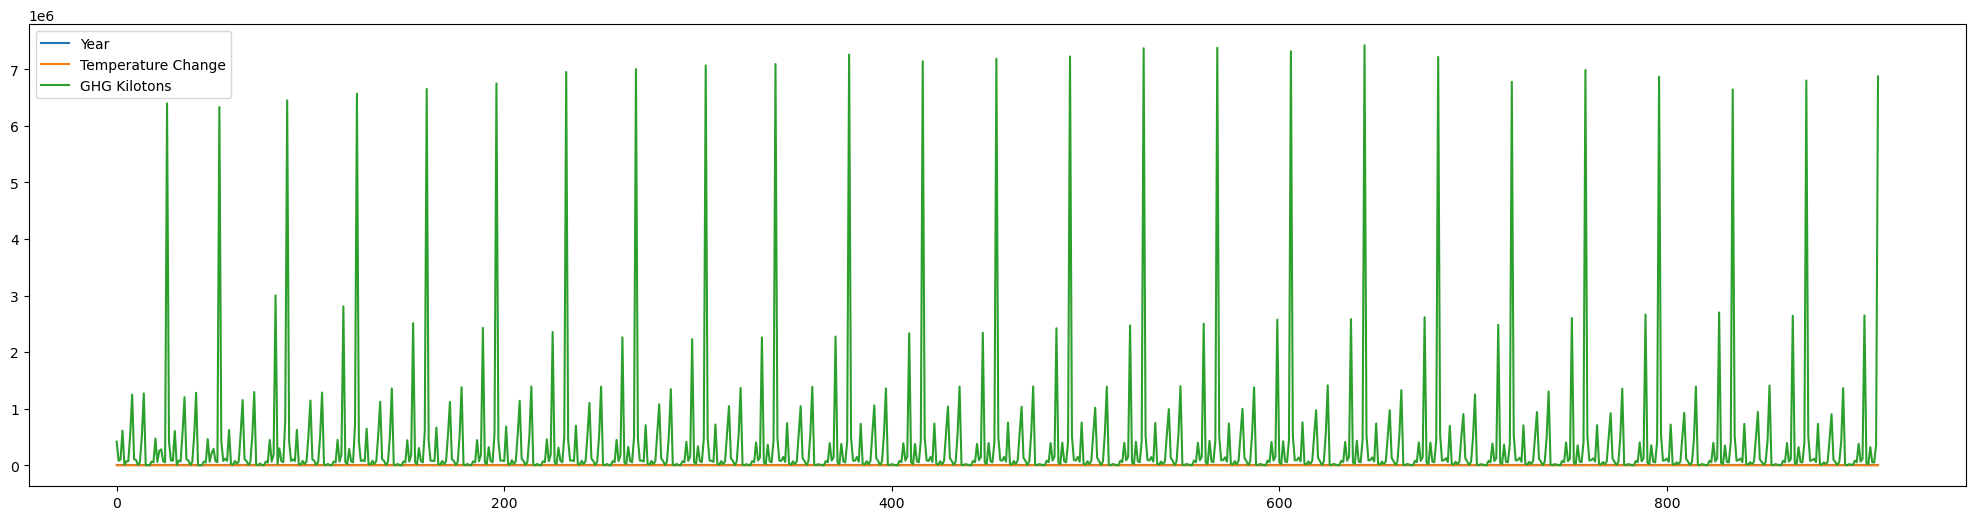

In [95]:
# df_data.set_index(['Country', 'Year'], inplace=True)
df_data.plot( figsize=(25,6))

Prophet work - Temperature Change

In [160]:
# First group the Temperature Change data by year to calculate the mean
annual_tempchange_average = df_tempchange.groupby("Year").mean("Temperature Change")
annual_tempchange_average = annual_tempchange_average.loc["2013" : "2023"]
annual_tempchange_average

,Temperature Change
Year,
2013,0.942585
2014,1.100459
2015,1.251544
2016,1.436512
2017,1.281651
2018,1.288008
2019,1.412537
2020,1.517276
2021,1.305467


In [161]:
# Reset the index, relabel the columns ds and y so the syntax is recognized by Prophet, and convert column to datetime
annual_tempchange_average_reset = annual_tempchange_average.reset_index()
annual_tempchange_average_reset.rename(columns={"Year" : "ds", "Temperature Change" : "y"}, inplace=True)
annual_tempchange_average_reset["ds"] = pd.to_datetime(annual_tempchange_average_reset["ds"].astype(str), format="%Y")
annual_tempchange_average_reset

,ds,y
0,2013-01-01,0.942585
1,2014-01-01,1.100459
2,2015-01-01,1.251544
3,2016-01-01,1.436512
4,2017-01-01,1.281651
5,2018-01-01,1.288008
6,2019-01-01,1.412537
7,2020-01-01,1.517276
8,2021-01-01,1.305467
9,2022-01-01,1.346939


In [162]:
# Call the Prophet function, store as an object for each DataFrame
m = Prophet()

In [163]:
# Fit the time-series model to the temperature change data.
m.fit(annual_tempchange_average_reset)

14:53:27 - cmdstanpy - INFO - Chain [1] start processing
14:53:28 - cmdstanpy - INFO - Chain [1] done processing


In [164]:
# Review the information for the dataframe to ensure all data types are as expected
annual_tempchange_average_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      11 non-null     datetime64[ns]
 1   y       11 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 304.0 bytes


In [165]:
# Create a future dataframe to hold predictions for temperature change
# Prediction period set at 10 years
future_temperature_trends = m.make_future_dataframe(periods=10, freq="YE")
future_temperature_trends.tail()

,ds
16,2028-12-31
17,2029-12-31
18,2030-12-31
19,2031-12-31
20,2032-12-31


In [166]:
# Make the future prediction for temperature change
forecast_temperature_trends = m.predict(future_temperature_trends)
forecast_temperature_trends.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1,2014-01-01,0.744126,1.053444,1.193841,0.744126,0.744126,0.376695,0.376695,0.376695,0.376695,0.376695,0.376695,0.0,0.0,0.0,1.120821
2,2015-01-01,0.783723,1.190903,1.319701,0.783723,0.783723,0.469784,0.469784,0.469784,0.469784,0.469784,0.469784,0.0,0.0,0.0,1.253507
3,2016-01-01,0.823320,1.327984,1.466968,0.823320,0.823320,0.576522,0.576522,0.576522,0.576522,0.576522,0.576522,0.0,0.0,0.0,1.399843
4,2017-01-01,0.862988,1.085897,1.227636,0.862988,0.862988,0.297376,0.297376,0.297376,0.297376,0.297376,0.297376,0.0,0.0,0.0,1.160364
5,2018-01-01,0.902507,1.210534,1.351872,0.902507,0.902507,0.376695,0.376695,0.376695,0.376695,0.376695,0.376695,0.0,0.0,0.0,1.279203
6,2019-01-01,0.942024,1.344673,1.483147,0.942024,0.942024,0.469784,0.469784,0.469784,0.469784,0.469784,0.469784,0.0,0.0,0.0,1.411808
7,2020-01-01,0.981541,1.488019,1.626670,0.981541,0.981541,0.576522,0.576522,0.576522,0.576522,0.576522,0.576522,0.0,0.0,0.0,1.558063
8,2021-01-01,1.021166,1.250068,1.392126,1.021166,1.021166,0.297376,0.297376,0.297376,0.297376,0.297376,0.297376,0.0,0.0,0.0,1.318541
9,2022-01-01,1.060682,1.366972,1.504439,1.060682,1.060682,0.376695,0.376695,0.376695,0.376695,0.376695,0.376695,0.0,0.0,0.0,1.437378
10,2023-01-01,1.100199,1.498677,1.636526,1.100199,1.100199,0.469784,0.469784,0.469784,0.469784,0.469784,0.469784,0.0,0.0,0.0,1.569983


c:\Users\chels\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\chels\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


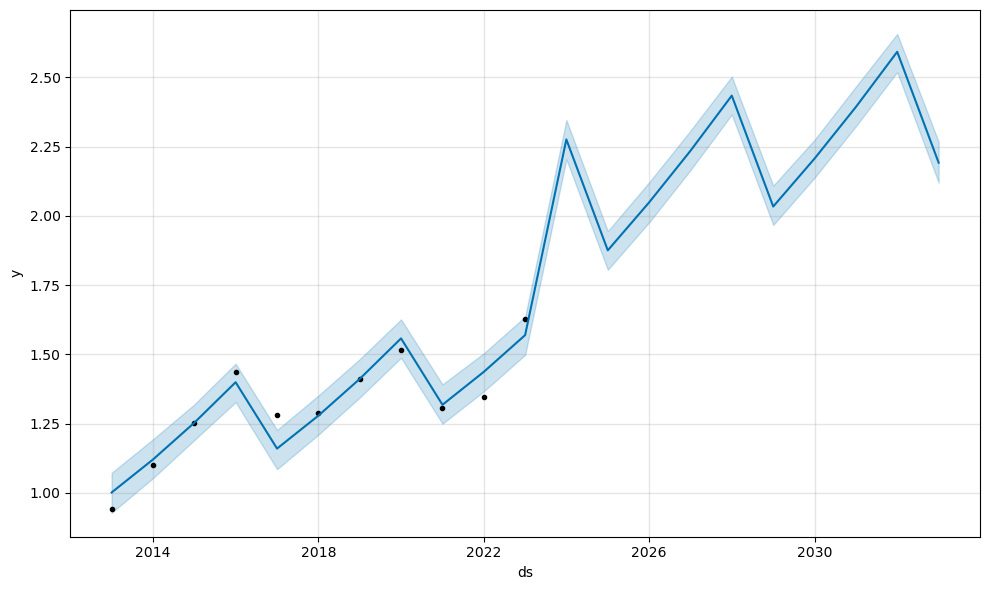

In [167]:
# Plot the Prophet predictions for Temperatures
m.plot(forecast_temperature_trends);

Prophet work - GHG Emissions

In [168]:
# First group the GHG by year to calculate the mean
annual_GHG_average = df_greenhouse_gas.groupby("Year").mean("GHG Kilotons")
annual_GHG_average = annual_GHG_average.loc["2004" : "2014"]
annual_GHG_average

,GHG Kilotons
Year,
2004,558869.287901
2005,558990.274620
2006,559211.216414
2007,561382.345748
2008,549427.633541
2009,514715.668033
2010,529602.442636
2011,523116.069631
2012,517292.383673


In [169]:
# Reset the index, relabel the columns ds and y so the syntax is recognized by Prophet
annual_GHG_average_reset = annual_GHG_average.reset_index()
annual_GHG_average_reset.rename(columns={"Year" : "ds", "GHG Kilotons" : "y"}, inplace=True)
annual_GHG_average_reset["ds"] = pd.to_datetime(annual_GHG_average_reset["ds"].astype(str), format="%Y")
annual_GHG_average_reset

,ds,y
0,2004-01-01,558869.287901
1,2005-01-01,558990.274620
2,2006-01-01,559211.216414
3,2007-01-01,561382.345748
4,2008-01-01,549427.633541
5,2009-01-01,514715.668033
6,2010-01-01,529602.442636
7,2011-01-01,523116.069631
8,2012-01-01,517292.383673
9,2013-01-01,515493.864294


In [170]:
# Call the Prophet function, store as an object for each DataFrame
m2 = Prophet()

In [171]:
# Fit the time-series model to the Greenhouse Gas data.
m2.fit(annual_GHG_average_reset)

14:54:59 - cmdstanpy - INFO - Chain [1] start processing
14:54:59 - cmdstanpy - INFO - Chain [1] done processing


In [172]:
# Review the information for the dataframe to ensure all data types are as expected
annual_GHG_average_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      11 non-null     datetime64[ns]
 1   y       11 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 304.0 bytes


In [184]:
# Create a future dataframe to hold predictions for GHG emissions
# Prediction period set at 10 years
future_GHG_trends = m2.make_future_dataframe(periods=10, freq="YE")
future_GHG_trends.tail()

,ds
16,2019-12-31
17,2020-12-31
18,2021-12-31
19,2022-12-31
20,2023-12-31


In [185]:
# Make the future prediction for GHG emissions
forecast_GHG_trends = m2.predict(future_GHG_trends)
forecast_GHG_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
16,2019-12-31,-433908.479265,376367.935737,397998.613844,-439339.967344,-427281.543555,820595.293893,820595.293893,820595.293893,820595.293893,820595.293893,820595.293893,0.0,0.0,0.0,386686.814628
17,2020-12-31,-436948.254582,466957.068813,489678.721480,-444213.921836,-428593.499158,914659.288047,914659.288047,914659.288047,914659.288047,914659.288047,914659.288047,0.0,0.0,0.0,477711.033464
18,2021-12-31,-439979.724502,440802.992919,464478.376825,-448851.723499,-429866.957009,891668.212190,891668.212190,891668.212190,891668.212190,891668.212190,891668.212190,0.0,0.0,0.0,451688.487688
19,2022-12-31,-443011.194422,404757.649650,432184.724277,-453697.130582,-431092.008368,860295.248335,860295.248335,860295.248335,860295.248335,860295.248335,860295.248335,0.0,0.0,0.0,417284.053914
20,2023-12-31,-446042.664342,358373.779346,391212.055879,-458940.138024,-432172.484058,820595.293893,820595.293893,820595.293893,820595.293893,820595.293893,820595.293893,0.0,0.0,0.0,374552.629551


c:\Users\chels\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\chels\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


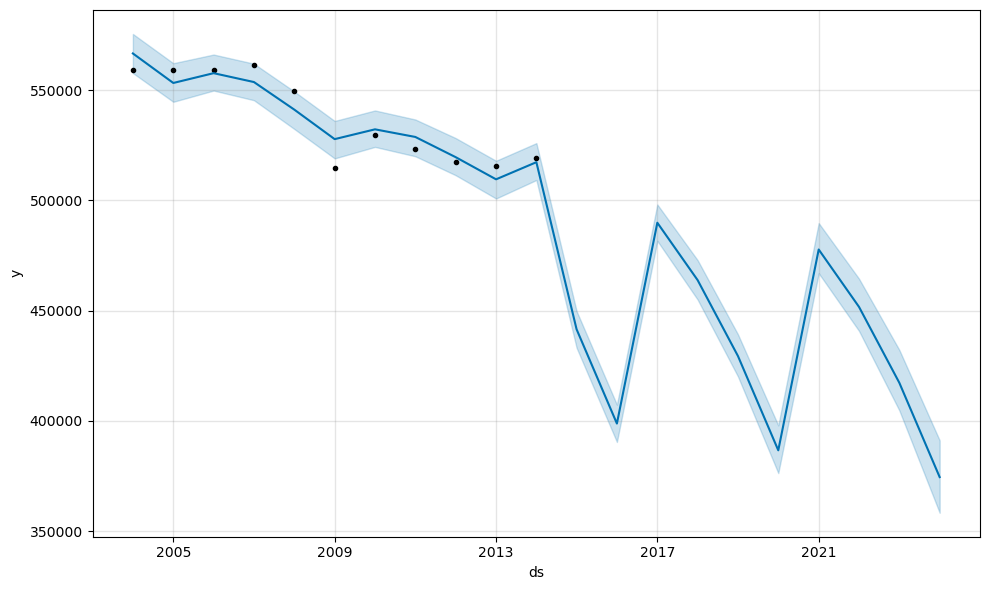

In [186]:
# Plot the Prophet predictions for GHG Emissions
m2.plot(forecast_GHG_trends);